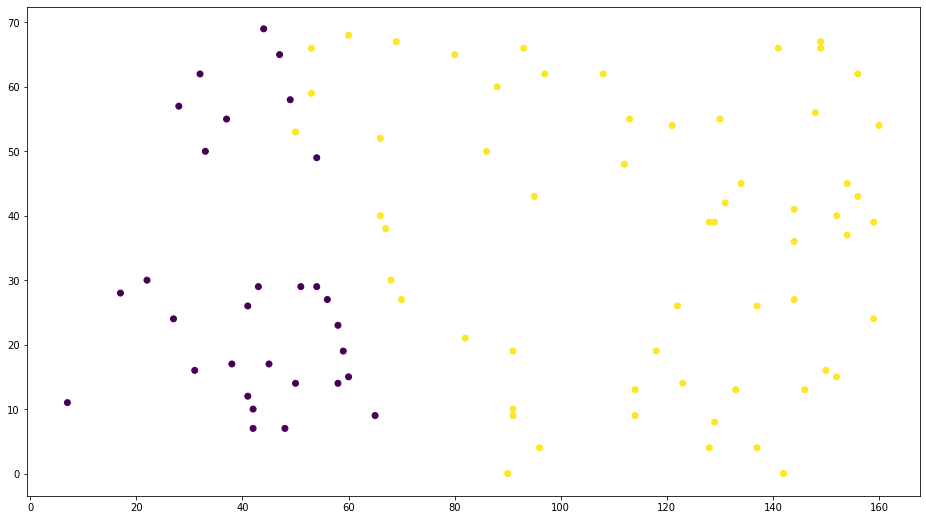

0 0.6931471805599454
1000 0.9977349101975057
2000 1.0644238208615429
3000 0.7023719836527886
4000 2.0685958048286506


/home/daniele/anaconda3/envs/master/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/daniele/anaconda3/envs/master/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]


5000 0.574787810103301
6000 0.8625850219869052
7000 0.7813370960755626
8000 0.24213549726593087
9000 0.2812259505378994
10000 0.3137556925256632
11000 0.3221378727805654
12000 0.3074574555572575
13000 0.2931231196587385
14000 0.2790894344055102
15000 0.26535222193295654
16000 0.251932346322827
17000 0.23886257310084172
18000 0.22617832549127123
19000 0.2139121058581692
20000 0.202090577781289
21000 0.19073308329045904
22000 0.17985063589728487
23000 0.16944525086819076
24000 0.15951401940415394
25000 0.1501398853263807
26000 0.14455670923039834
27000 0.14321356802372726
28000 0.14192213334732157
29000 0.1406762394516216
30000 0.13947322163961975
31000 0.13831062895427748
32000 0.13718620271919896
33000 0.1360978576383911
34000 0.1350436651046668
35000 0.13402183842008064
36000 0.1330307196764918
37000 0.13206876808163132
38000 0.13113454954723522
39000 0.13022672738198715
40000 0.1293440539540652
41000 0.12848536320672072
42000 0.1276495639261072
43000 0.12683563367399822
44000 0.12604

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,9]


def sigmoid(z):
    return 1./(1.+np.exp(-z))

def logreg_inference(x,w,b):
    return sigmoid(x@w+b)

def cross_entropy(p,y):
    return (-y*np.log(p)-(1-y)*np.log(1-p)).mean()

def logreg_train(x, y, epochs, lr):
    m,n=x.shape
    w=np.zeros(n)
    b=0
    for step in range(epochs):
        p=logreg_inference(x,w,b)
        loss=cross_entropy(p,y)
        if step%1000==0:
            print(step, loss)
        grad_b=(p-y).mean()
        grad_w=(x.T@(p-y))/m
        b-=lr*grad_b
        w-=lr*grad_w
    return w,b

data=np.loadtxt("exam.txt")
x=data[:,:2]
y=data[:,2]

plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

w,b = logreg_train(x,y, int(1e5),0.005)
p=logreg_inference(x,w,b)
predictions=(p>0.5)
accuracy=(predictions==y).mean()
print(accuracy*100)
#x_p=np.linspace(0,150)
#plt.plot(x_p,logreg_inference(x_p,w,b))


[  0.   0.   4.   4.   4.   7.   7.   7.   8.   9.   9.   9.  10.  10.
  11.  12.  13.  13.  13.  14.  14.  14.  15.  15.  16.  16.  17.  17.
  17.  19.  19.  19.  21.  22.  23.  24.  24.  26.  26.  26.  27.  27.
  27.  27.  28.  28.  29.  29.  29.  30.  30.  31.  32.  33.  36.  37.
  37.  38.  38.  39.  39.  39.  40.  40.  41.  41.  41.  42.  42.  42.
  43.  43.  43.  44.  45.  45.  45.  47.  48.  48.  49.  49.  50.  50.
  50.  50.  51.  52.  53.  53.  53.  54.  54.  54.  54.  55.  55.  55.
  56.  56.  57.  58.  58.  58.  59.  59.  60.  60.  60.  62.  62.  62.
  62.  65.  65.  65.  66.  66.  66.  66.  66.  66.  67.  67.  67.  68.
  68.  69.  69.  70.  80.  82.  86.  88.  90.  91.  91.  91.  93.  95.
  96.  97. 108. 112. 113. 114. 114. 118. 121. 122. 123. 128. 128. 129.
 129. 130. 131. 133. 134. 137. 137. 141. 142. 144. 144. 144. 146. 148.
 149. 149. 150. 152. 152. 154. 154. 156. 156. 159. 159. 160.]
